# House prices prediction

---

# 1. Data exploration

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [2]:
# Reading .csv file
df = pd.read_csv('../data/housing_data.csv')
# Displaying the first 5 rows of the dataframe
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,3150000,3450,1,1,1,True,False,False,False,False,0,False,furnished
1,2275000,3970,1,1,1,False,False,False,False,False,0,False,unfurnished
2,7070000,8880,2,1,1,True,False,False,False,True,1,False,semi-furnished
3,6930000,13200,2,1,1,True,False,True,True,False,1,False,furnished
4,6419000,6750,2,1,1,True,True,True,False,False,2,True,furnished


### Data understanding

In [3]:
print(f'Shape of the dataframe: {df.shape}')

Shape of the dataframe: (545, 13)


The dataset consists of 13 features and 545 samples.

In [4]:
# Checking information about composition, data types and data quality of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    bool  
 6   guestroom         545 non-null    bool  
 7   basement          545 non-null    bool  
 8   hotwaterheating   545 non-null    bool  
 9   airconditioning   545 non-null    bool  
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    bool  
 12  furnishingstatus  545 non-null    object
dtypes: bool(6), int64(6), object(1)
memory usage: 33.1+ KB


In [5]:
# Statistical summary of the dataframe
df.describe(include='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,NaN,False,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [6]:
# Checking number of unique rows in each column
df.nunique().sort_values()

mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
prefarea              2
furnishingstatus      3
bathrooms             4
stories               4
parking               4
bedrooms              6
price               219
area                284
dtype: int64

In [7]:
# Checking for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Dataset is complete, no NaN values were detected. It allows us to work with the entire dataset without the need for imputation or handling missing data.

# 2. Exploratory Data Analysis (EDA)

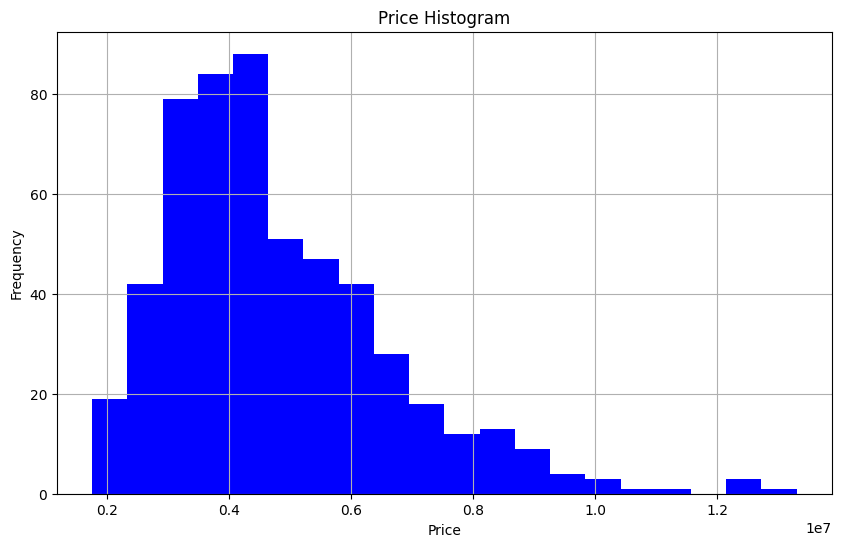

In [8]:
# 'price' histogram
plt.figure(figsize=(10, 6))
plt.grid()
plt.hist(df['price'], bins=20, color='blue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Histogram')
plt.show()

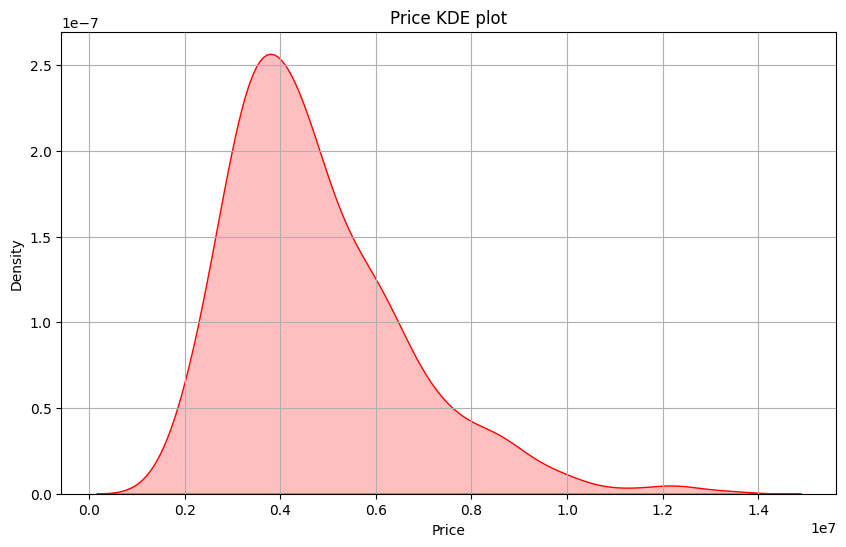

In [9]:
# 'price' KDE plot
plt.figure(figsize=(10, 6))
plt.grid()
sns.kdeplot(df['price'], color='red', label='KDE', fill=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Price KDE plot')
plt.show()

The targe variable - **price** seems to be normally distributed with mean value around 0.4 * 1e7 and averaging around 20 units.

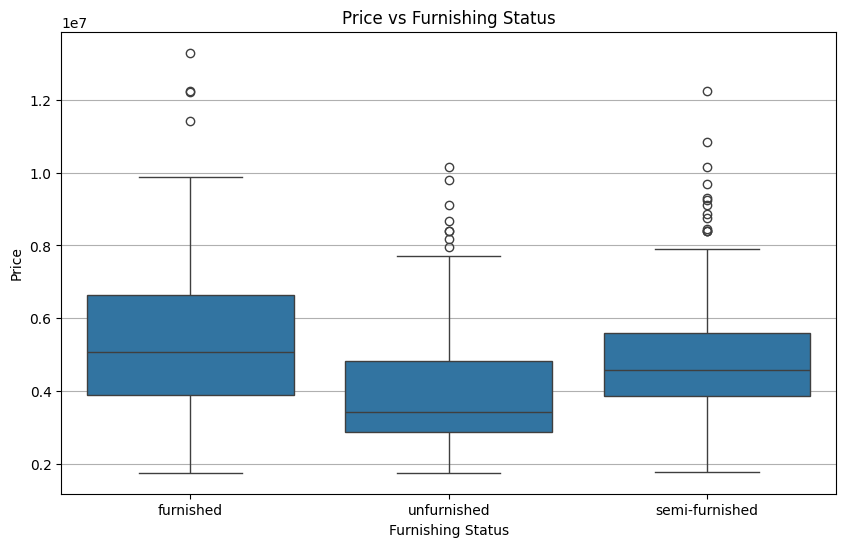

In [10]:
# 'price' vs 'furningstatus' boxplot
plt.figure(figsize=(10, 6))
plt.grid()
sns.boxplot(x="furnishingstatus", y="price", data=df)
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.title('Price vs Furnishing Status')
plt.show()

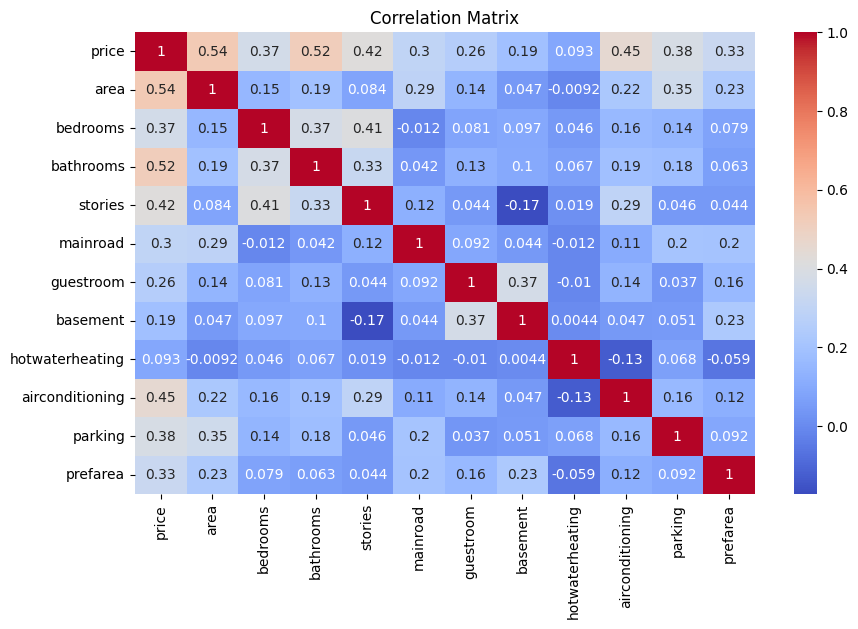

In [11]:
# heatmap of correlation matrix
corr = df.drop("furnishingstatus", axis=1).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

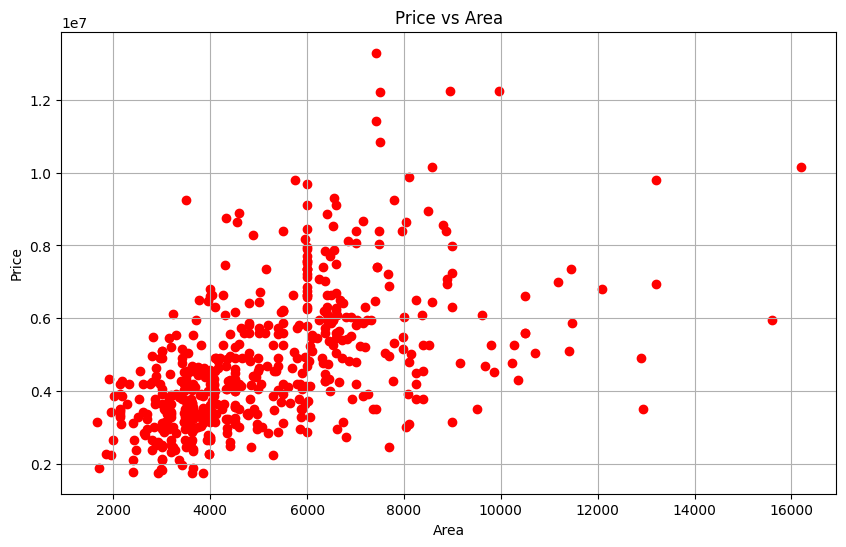

In [12]:
# 'price' vs 'area' scatter plot
plt.figure(figsize=(10, 6))
plt.grid()
plt.scatter(df["area"], df["price"], color="red")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Price vs Area")
plt.show()

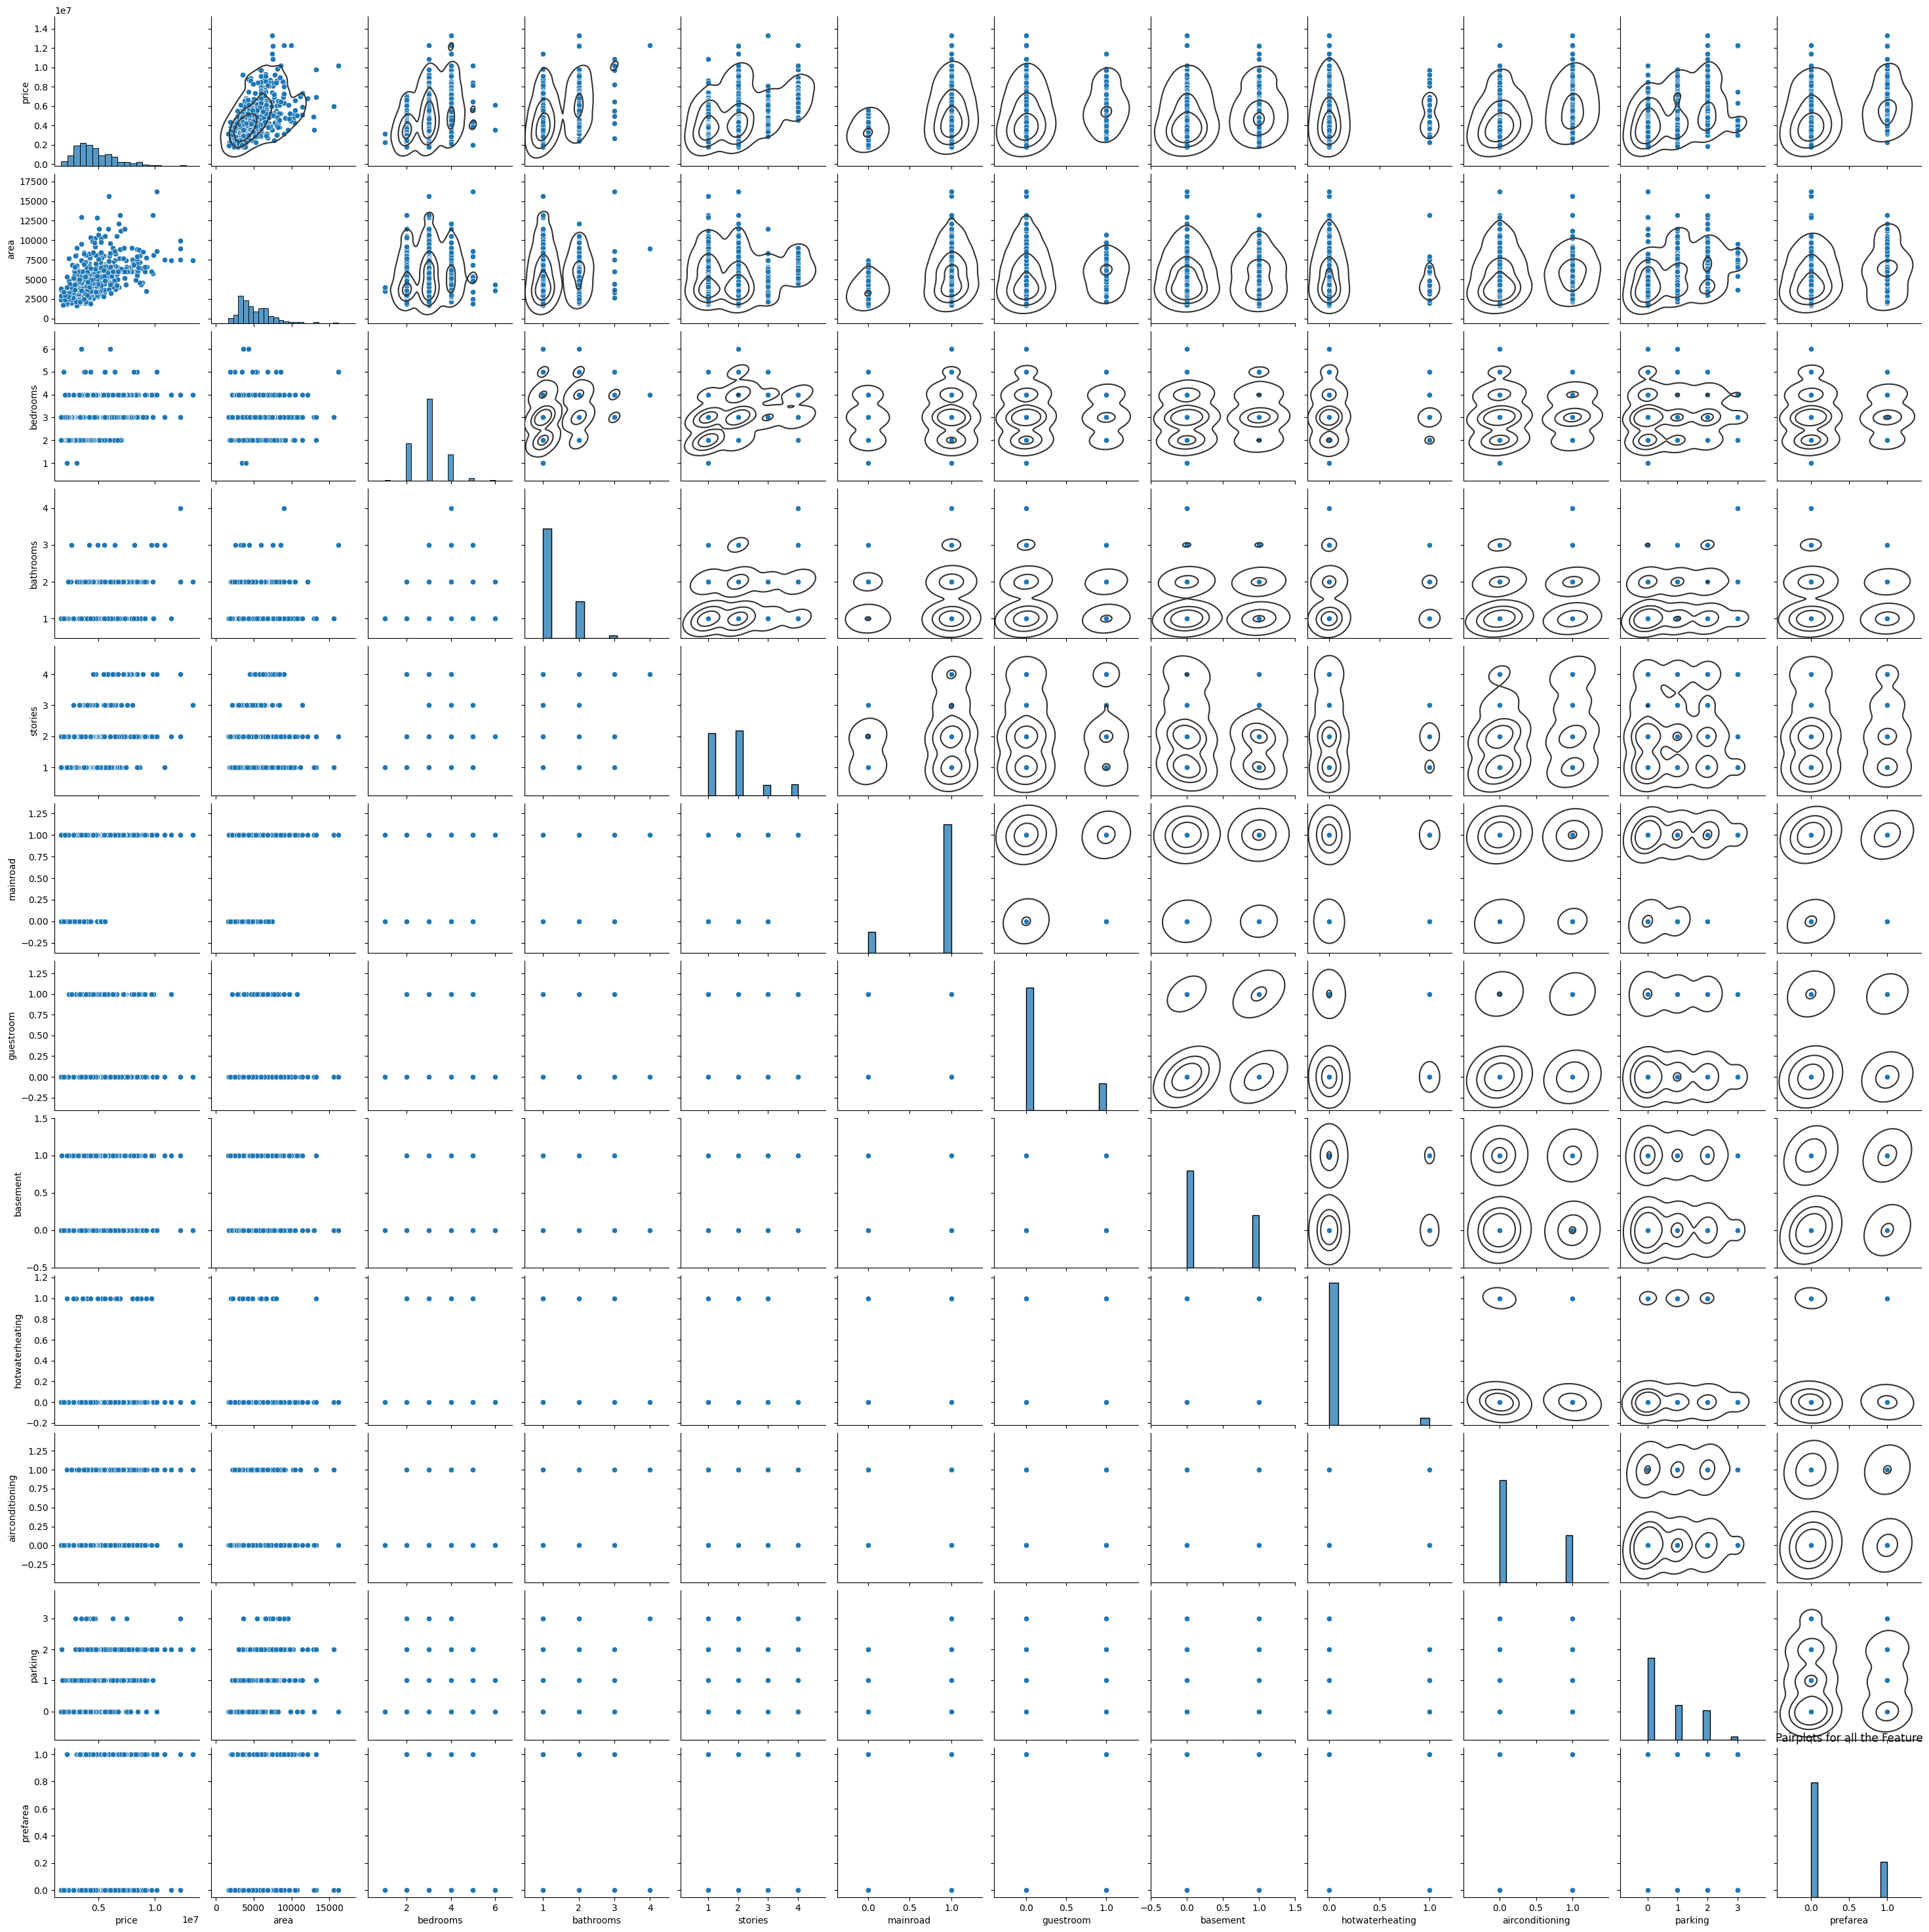

In [13]:
g = sns.pairplot(df)
plt.title("Pairplots for all the Feature")
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

# 3. Data cleaning and preprocessing

Changes that have to be made:
 - Binary Categorical Values: convert categorial variables True/False to 0/1 values. This can be done by changing the type of the dataframe.
 - Dummy variables: convert variables from 'furnishingstatus' into dummy variables

### Remove duplicates

In [14]:
df.drop_duplicates(inplace=True)
print(f'Shape of the dataframe after removing duplicates: {df.shape}')

Shape of the dataframe after removing duplicates: (545, 13)


### Dummy variables

In [15]:
# to avoid redundancy we can drop first column of the dummy variables. We want to avoid the dummy variable trap or multicollinearity in regression models
dummy_col = pd.get_dummies(df["furnishingstatus"], drop_first=True)
dummy_col.head()

,semi-furnished,unfurnished
0,False,False
1,False,True
2,True,False
3,False,False
4,False,False


In [16]:
df = pd.concat([df, dummy_col], axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,3150000,3450,1,1,1,True,False,False,False,False,0,False,furnished,False,False
1,2275000,3970,1,1,1,False,False,False,False,False,0,False,unfurnished,False,True
2,7070000,8880,2,1,1,True,False,False,False,True,1,False,semi-furnished,True,False
3,6930000,13200,2,1,1,True,False,True,True,False,1,False,furnished,False,False
4,6419000,6750,2,1,1,True,True,True,False,False,2,True,furnished,False,False


In [17]:
df.drop("furnishingstatus", axis=1, inplace=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,3150000,3450,1,1,1,True,False,False,False,False,0,False,False,False
1,2275000,3970,1,1,1,False,False,False,False,False,0,False,False,True
2,7070000,8880,2,1,1,True,False,False,False,True,1,False,True,False
3,6930000,13200,2,1,1,True,False,True,True,False,1,False,False,False
4,6419000,6750,2,1,1,True,True,True,False,False,2,True,False,False


### Binary Categorical Values (True/False)

In [18]:
# This could be performed if instead of True/False falues 'yes'/'no' values were present in the dataframe
# categorical_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
# df[categorical_cols] = df[categorical_cols].apply(lambda x: x.map({True: 1, False: 0}))

In [19]:
df = df.astype(int)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,3150000,3450,1,1,1,1,0,0,0,0,0,0,0,0
1,2275000,3970,1,1,1,0,0,0,0,0,0,0,0,1
2,7070000,8880,2,1,1,1,0,0,0,1,1,0,1,0
3,6930000,13200,2,1,1,1,0,1,1,0,1,0,0,0
4,6419000,6750,2,1,1,1,1,1,0,0,2,1,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   stories          545 non-null    int64
 5   mainroad         545 non-null    int64
 6   guestroom        545 non-null    int64
 7   basement         545 non-null    int64
 8   hotwaterheating  545 non-null    int64
 9   airconditioning  545 non-null    int64
 10  parking          545 non-null    int64
 11  prefarea         545 non-null    int64
 12  semi-furnished   545 non-null    int64
 13  unfurnished      545 non-null    int64
dtypes: int64(14)
memory usage: 59.7 KB


### Removing 'price' outliers

In [21]:
df_cp = df.copy()

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

df = df[df['price'] <= (Q3 + (1.5 * IQR))]
df = df[df['price'] >= (Q1 - (1.5 * IQR))]
df = df.reset_index(drop=True)

print(f"Shape of the dataframe before removing outliers: {df_cp.shape}")
print(f"Shape of the dataframe after removing outliers: {df.shape}")

Shape of the dataframe before removing outliers: (545, 14)
Shape of the dataframe after removing outliers: (530, 14)


# 4. Data manipulation

### Train/test split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X, y = df.drop("price", axis=1), df["price"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [25]:
X_train.reset_index(drop=True, inplace=True)

In [26]:
print(f'Original dataframe shape: {df.shape}')
print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')

Original dataframe shape: (530, 14)
Training set shape: (424, 13)
Test set shape: (106, 13)


In [27]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4100,3,2,3,1,0,0,0,1,2,0,1,0
1,2550,3,1,2,1,0,1,0,0,0,0,0,0
2,4000,3,1,2,1,0,0,0,0,1,0,0,1
3,8500,3,2,4,1,0,0,0,1,2,0,0,0
4,5640,2,1,1,0,0,0,0,0,0,0,1,0


In [28]:
idx = 1
example_for_final_pred = X_test.iloc[idx, :].values
example_for_final_pred

array([2398,    3,    1,    1,    1,    0,    0,    0,    0,    0,    1,
          1,    0])

In [29]:
value_for_final_pred = y_test.iloc[idx]
value_for_final_pred

np.int64(3118850)

### Data scaling

Scaling data is necessary to ensure fair and accurate comparisons between features, improve model performance, speed up convergence, and avoid biased results in distance-based algorithms

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
X_train.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,5069.806604,2.943396,1.261792,1.808962,0.846698,0.162736,0.349057,0.047170,0.299528,0.662736,0.224057,0.438679,0.318396
std,2066.706383,0.741606,0.461114,0.877248,0.360704,0.369561,0.477235,0.212252,0.458593,0.834781,0.417452,0.496812,0.466404
min,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3520.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4510.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6331.250000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,13200.000000,6.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [32]:
scaler = MinMaxScaler()
# scaling could be perfoemed just on area, bedrooms, bathrooms and stories beacuse other columns are already in binary format (0, 1). However, I have performed scaling on all the columns
X_train = scaler.fit_transform(X_train)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,0.212121,0.4,0.5,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,1.0,0.0
1,0.077922,0.4,0.0,0.333333,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.203463,0.4,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,1.0
3,0.593074,0.4,0.5,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,0.0,0.0
4,0.345455,0.2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0


In [33]:
X_test = scaler.transform(X_test)

X_test = pd.DataFrame(X_test, columns=X.columns)
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,0.476623,0.4,0.5,0.0,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,1.0
1,0.064762,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,0.0
2,0.132900,0.2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1.0
3,0.172294,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
4,0.124675,0.2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,1.0


### Save data in pickle format

In [35]:
import pickle

np.save('../data/X_train.npy', X_train)
np.save('../data/X_test.npy', X_test)

np.save('../data/y_train.npy', y_train)
np.save('../data/y_test.npy', y_test)

with open('../models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# 5. Models training

In [36]:
X_train = np.load('../data/X_train.npy')
X_test = np.load('../data/X_test.npy')

y_train = np.load('../data/y_train.npy')
y_test = np.load('../data/y_test.npy')

In [37]:
r2_values = []
mse_values = []
rmse_values = []

In [38]:
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error


def calculate_metrics(true: np.array, pred: np.array, model_name: str, eval_set: str):
    r2 = r2_score(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = root_mean_squared_error(true, pred)

    print(f"[{model_name}] R2 Score on {eval_set} set: {r2:.4f}")
    print(f"[{model_name}] Mean Squared Error on {eval_set} set: {mse:.4f}")
    print(f"[{model_name}] Root Mean Squared Error on {eval_set} set: {rmse:.4f}")

    return r2, mse, rmse

In [39]:
def plot_predictions(true: np.array, pred: np.array, model_name: str):
    plt.figure(figsize=[15, 4])

    plt.subplot(1, 2, 1)
    sns.histplot((true - pred), color='red', kde=True)
    plt.title(f"{model_name} Error terms")
    plt.xlabel("Errors")

    plt.subplot(1, 2, 2)
    plt.scatter(true, pred, color='blue')
    plt.plot([true.min(), true.max()], [true.min(), true.max()], 'r--', lw=2)
    plt.title(f"{model_name} Test vs Prediction")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")

    plt.show()

### a) Multiple Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [42]:
# check the cooefficients
coefficients = linear_regression.coef_
intercept = linear_regression.intercept_

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

Coefficients: [2627865.17676465  182431.00253459 1474104.49216639 1417688.57897254
  413310.61542304  338195.17942766  339039.25752988  841202.27924192
  889000.08890582  500956.70689402  545463.94052133  -76940.19042752
 -405742.40563375]
Intercept: 2285149.7387466026


#### Train prediction

In [43]:
lin_train_pred = linear_regression.predict(X_train)
lin_train_r2, lin_train_mse, lin_train_rmse = calculate_metrics(
    y_train, lin_train_pred, 'Linear regression', "train"
)

[Linear regression] R2 Score on train set: 0.6822
[Linear regression] Mean Squared Error on train set: 815113905885.2974
[Linear regression] Root Mean Squared Error on train set: 902836.5887


#### Test prediction

In [44]:
lin_test_pred = linear_regression.predict(X_test)
lin_test_r2, lin_test_mse, lin_test_rmse = calculate_metrics(
    y_test, lin_test_pred, 'Linear regression', "test"
)

[Linear regression] R2 Score on test set: 0.5905
[Linear regression] Mean Squared Error on test set: 1004405991698.7017
[Linear regression] Root Mean Squared Error on test set: 1002200.5746


In [45]:
r2_values.append((lin_train_r2, lin_test_r2))
mse_values.append((lin_train_mse, lin_test_mse))
rmse_values.append((lin_train_rmse, lin_test_rmse))

#### Plot predictions against true values

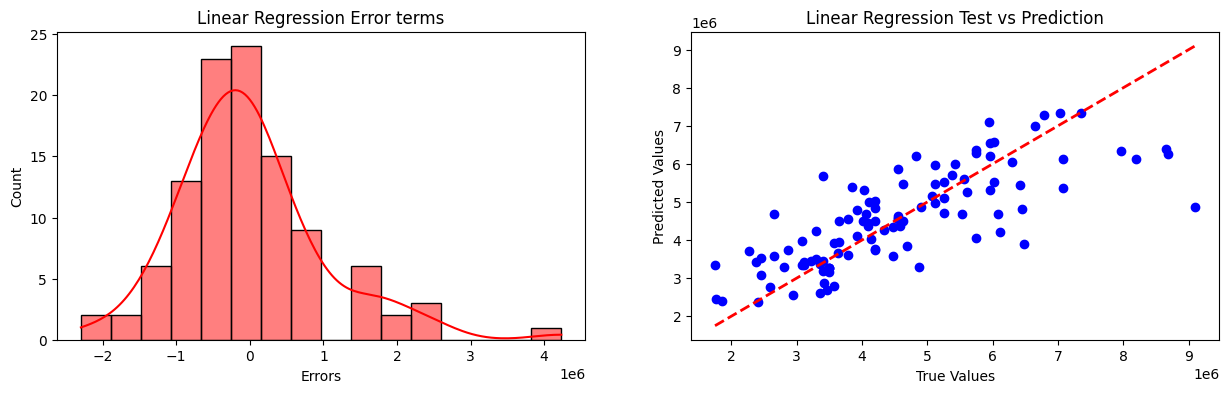

In [46]:
plot_predictions(y_test, lin_test_pred, "Linear Regression")

### b) Ridge Regression

In [47]:
from sklearn.linear_model import Ridge

In [48]:
ridge_regression = Ridge()
ridge_regression.fit(X_train, y_train)

Ridge()

#### Train prediction

In [49]:
ridge_train_pred = ridge_regression.predict(X_train)
ridge_train_r2, ridge_train_mse, ridge_train_rmse = calculate_metrics(
    y_train, ridge_train_pred, 'Ridge regression', "train"
)

[Ridge regression] R2 Score on train set: 0.6817
[Ridge regression] Mean Squared Error on train set: 816562979774.2332
[Ridge regression] Root Mean Squared Error on train set: 903638.7441


#### Test prediction

In [50]:
ridge_test_pred = ridge_regression.predict(X_test)
ridge_test_r2, ridge_test_mse, ridge_test_rmse = calculate_metrics(
    y_test, ridge_test_pred, 'Ridge regression', "test"
)

[Ridge regression] R2 Score on test set: 0.5923
[Ridge regression] Mean Squared Error on test set: 999888028085.9012
[Ridge regression] Root Mean Squared Error on test set: 999944.0125


In [51]:
r2_values.append((ridge_train_r2, ridge_test_r2))
mse_values.append((ridge_train_mse, ridge_test_mse))
rmse_values.append((ridge_train_rmse, ridge_test_rmse))

#### Plot predictions against true values

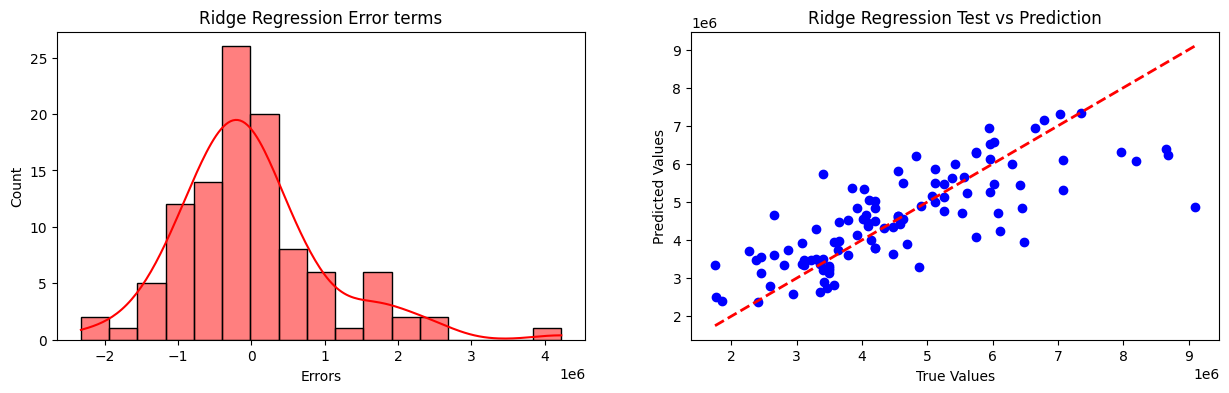

In [52]:
plot_predictions(y_test, ridge_test_pred, "Ridge Regression")

### c) Elastic-Net Regression

In [53]:
from sklearn.linear_model import ElasticNet

In [54]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)

ElasticNet()

#### Train prediction

In [55]:
elastic_train_pred = elastic_net.predict(X_train)
elastic_train_r2, elastic_train_mse, elastic_train_rmse = calculate_metrics(
    y_train, elastic_train_pred, 'Elastic Net', "train"
)

[Elastic Net] R2 Score on train set: 0.3468
[Elastic Net] Mean Squared Error on train set: 1675410611502.6223
[Elastic Net] Root Mean Squared Error on train set: 1294376.5339


#### Test prediction

In [56]:
elastic_test_pred = elastic_net.predict(X_test)
elastic_test_r2, elastic_test_mse, elastic_test_rmse = calculate_metrics(
    y_test, elastic_test_pred, 'Elastic Net', "test"
)

[Elastic Net] R2 Score on test set: 0.3108
[Elastic Net] Mean Squared Error on test set: 1690316152694.1248
[Elastic Net] Root Mean Squared Error on test set: 1300121.5915


In [57]:
r2_values.append((elastic_train_r2, elastic_test_r2))
mse_values.append((elastic_train_mse, elastic_test_mse))
rmse_values.append((elastic_train_rmse, elastic_test_rmse))

#### Plot predictions against true values

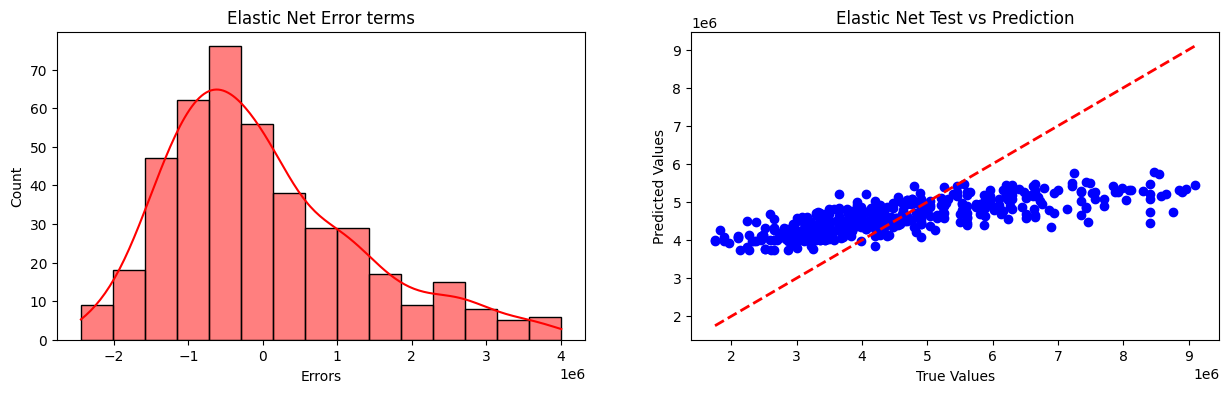

In [58]:
plot_predictions(y_train, elastic_train_pred, "Elastic Net")

### d) Polynomial Regression

In [59]:
from sklearn.preprocessing import PolynomialFeatures

In [60]:
n_degree = 7

poly_train_rmse = []
poly_test_rmse = []

for i in range(2, n_degree):
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(X_train)
    X_poly_test = poly_reg.transform(X_test)

    poly_linear = LinearRegression()
    poly_linear.fit(X_poly, y_train)

    poly_train_pred = poly_linear.predict(X_poly)
    poly_train_rmse.append(root_mean_squared_error(y_train, poly_train_pred))

    poly_test_pred = poly_linear.predict(X_poly_test)
    poly_test_rmse.append(root_mean_squared_error(y_test, poly_test_pred))

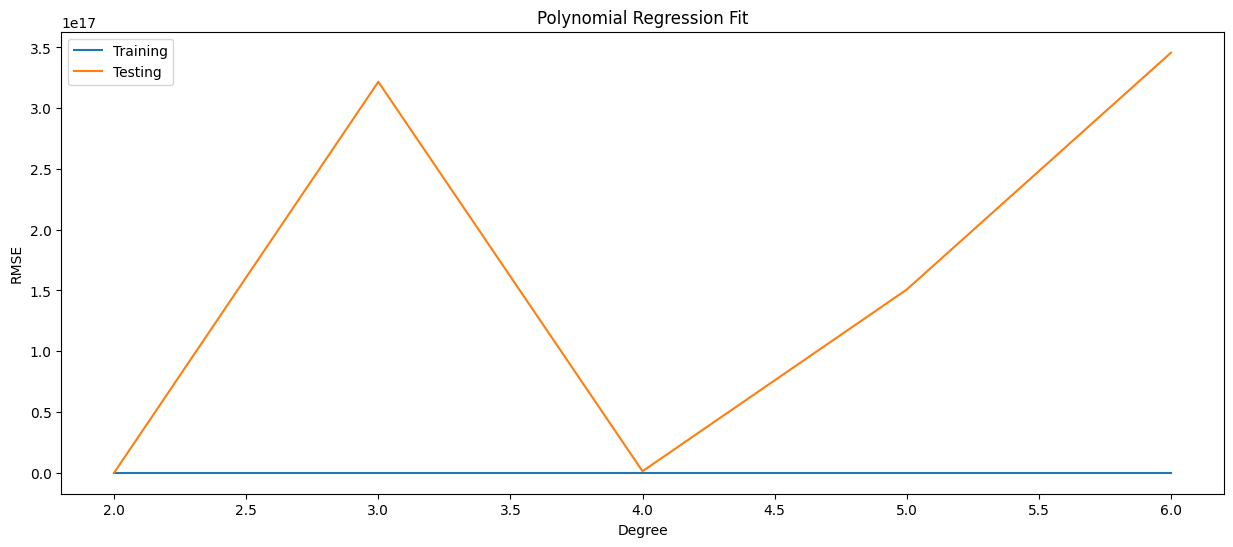

In [61]:
plt.figure(figsize=[15, 6])
plt.plot(range(2, n_degree), poly_train_rmse, label="Training")
plt.plot(range(2, n_degree), poly_test_rmse, label="Testing")
plt.title("Polynomial Regression Fit")
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.legend()
plt.show()

We can choose 4th degree polynomial.

In [62]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.transform(X_test)

poly_linear = LinearRegression()
poly_linear.fit(X_poly, y_train)

LinearRegression()

#### Train prediction

In [63]:
poly_train_pred = poly_linear.predict(X_poly)
poly_train_r2, poly_train_mse, poly_train_rmse = calculate_metrics(
    y_train, poly_train_pred, 'Polynomial Regression', "train"
)

[Polynomial Regression] R2 Score on train set: 0.9931
[Polynomial Regression] Mean Squared Error on train set: 17576412249.5094
[Polynomial Regression] Root Mean Squared Error on train set: 132576.0621


#### Test prediction

In [64]:
poly_test_pred = poly_linear.predict(X_poly_test)
poly_test_r2, poly_test_mse, poly_test_rmse = calculate_metrics(
    y_test, poly_test_pred, 'Polynomial Regression', "test"
)

[Polynomial Regression] R2 Score on test set: -627341738363399552.0000
[Polynomial Regression] Mean Squared Error on test set: 1538602877538063163507641155584.0000
[Polynomial Regression] Root Mean Squared Error on test set: 1240404320186794.2500


In [65]:
r2_values.append((poly_train_r2, poly_test_r2))
mse_values.append((poly_train_mse, poly_test_mse))
rmse_values.append((poly_train_rmse, poly_test_rmse))

#### Plot predictions against true values

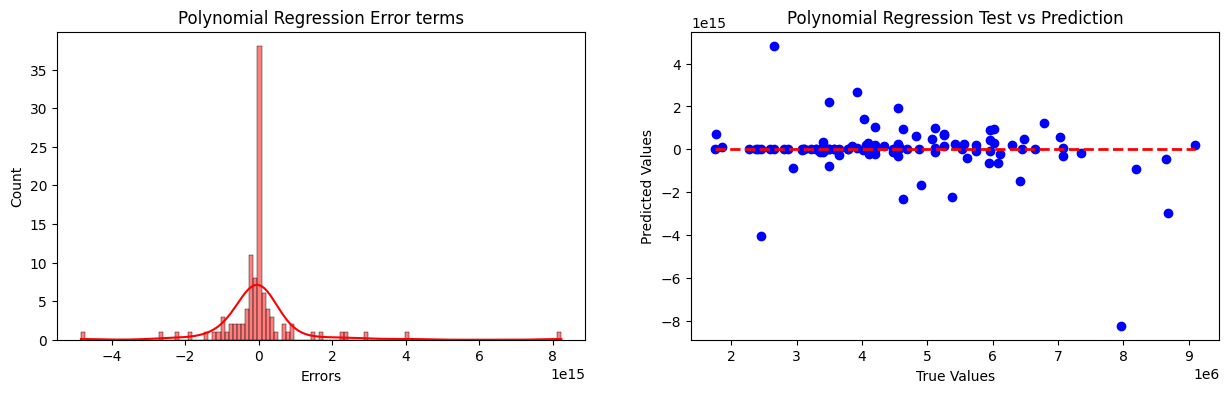

In [66]:
plot_predictions(y_test, poly_test_pred, "Polynomial Regression")

### e) Random Forest Regression

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
forest_regression = RandomForestRegressor(n_estimators=100, random_state=101)
forest_regression.fit(X_train, y_train)

RandomForestRegressor(random_state=101)

#### Train prediction

In [69]:
forest_train_pred = forest_regression.predict(X_train)
forest_train_r2, forest_train_mse, forest_train_rmse = calculate_metrics(
    y_train, forest_train_pred, 'Random Forest', "train"
)

[Random Forest] R2 Score on train set: 0.9491
[Random Forest] Mean Squared Error on train set: 130627837346.3191
[Random Forest] Root Mean Squared Error on train set: 361424.7326


#### Test prediction

In [70]:
forest_test_pred = forest_regression.predict(X_test)
forest_test_r2, forest_test_mse, forest_test_rmse = calculate_metrics(
    y_test, forest_test_pred, 'Random Forest', "test"
)

[Random Forest] R2 Score on test set: 0.5744
[Random Forest] Mean Squared Error on test set: 1043724347015.7666
[Random Forest] Root Mean Squared Error on test set: 1021628.2822


In [71]:
r2_values.append((forest_train_r2, forest_test_r2))
mse_values.append((forest_train_mse, forest_test_mse))
rmse_values.append((forest_train_rmse, forest_test_rmse))

#### Plot predictions against true values

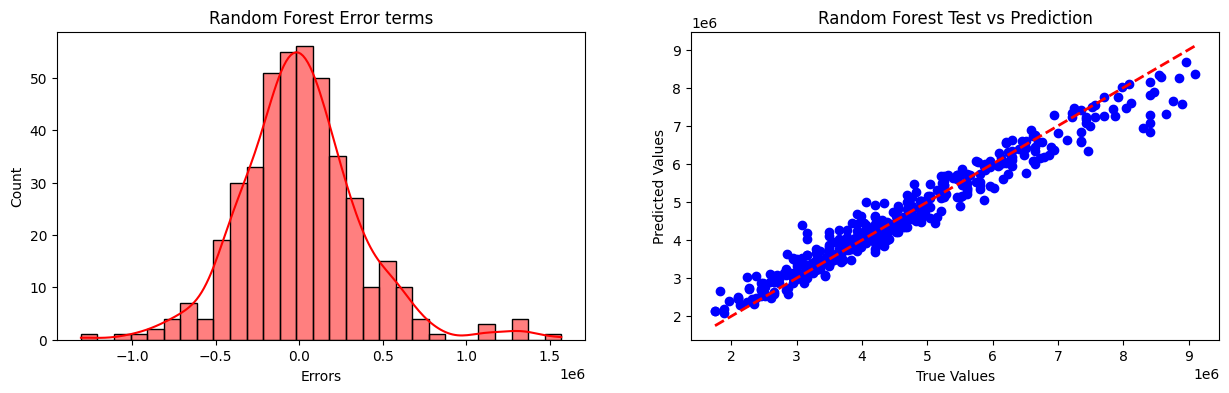

In [72]:
plot_predictions(y_train, forest_train_pred, "Random Forest")

### Models comparison

In [73]:
# Creating a dataframe to store the metrics
models = ["Linear Regression", "Ridge Regression", "Elastic Net", "Polynomial Regression", "Random Forest"]
metrics_df = pd.DataFrame(models, columns=["Model"])
metrics_df["R2 Train"] = [r2 for r2, _ in r2_values]
metrics_df["R2 Test"] = [r2 for _, r2 in r2_values]
metrics_df["MSE Train"] = [mse for mse, _ in mse_values]
metrics_df["MSE Test"] = [mse for _, mse in mse_values]
metrics_df["RMSE Train"] = [rmse for rmse, _ in rmse_values]
metrics_df["RMSE Test"] = [rmse for _, rmse in rmse_values]

metrics_df.set_index("Model", inplace=True)
metrics_df

,R2 Train,R2 Test,MSE Train,MSE Test,RMSE Train,RMSE Test
Model,,,,,,
Linear Regression,0.682220,5.904689e-01,8.151139e+11,1.004406e+12,9.028366e+05,1.002201e+06
Ridge Regression,0.681655,5.923110e-01,8.165630e+11,9.998880e+11,9.036387e+05,9.999440e+05
Elastic Net,0.346826,3.107995e-01,1.675411e+12,1.690316e+12,1.294377e+06,1.300122e+06
Polynomial Regression,0.993148,-6.273417e+17,1.757641e+10,1.538603e+30,1.325761e+05,1.240404e+15
Random Forest,0.949074,5.744374e-01,1.306278e+11,1.043724e+12,3.614247e+05,1.021628e+06


In [74]:
def plot_r2_of_the_models(set_type: str):
    R2 = round(metrics_df[f"R2 {set_type}"].sort_values(ascending=True), 4)
    plt.hlines(y=R2.index, xmin=0, xmax=R2.values, color="skyblue")
    plt.plot(R2.values, R2.index, "o", color="skyblue")
    plt.title(f"R2 Score of the Models on {set_type} data")
    plt.xlabel("R2 Score")

    for i, v in enumerate(R2):
        plt.text(v + 0.02, i - 0.05, f"{v * 100:.2f}", color="blue")

    plt.xlim([0, 1.1])
    plt.show()

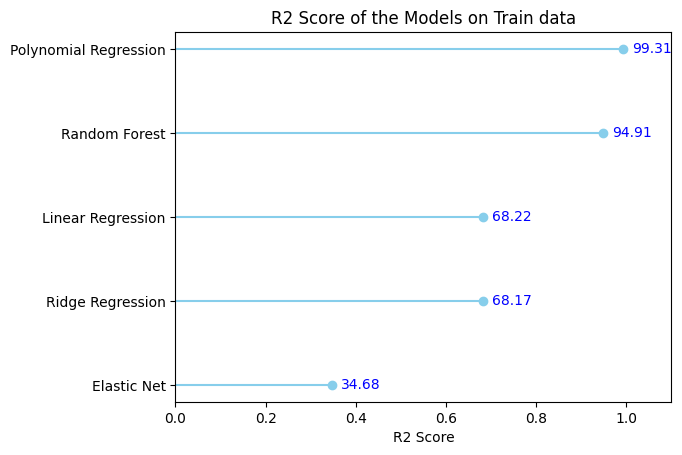

In [75]:
plot_r2_of_the_models('Train')

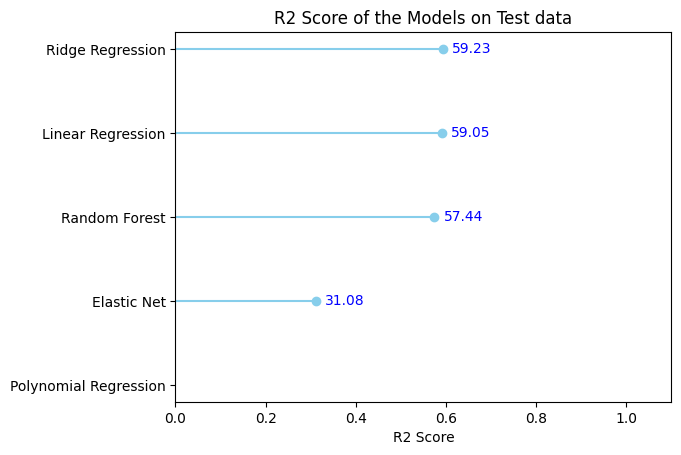

In [76]:
plot_r2_of_the_models("Test")

In [77]:
def plot_mse_of_the_models():
    plt.bar(np.arange(len(metrics_df)), metrics_df["MSE Train"], color="skyblue", width=0.3, label="Train")
    plt.bar(np.arange(len(metrics_df)) + 0.3, metrics_df["MSE Test"], color="orange", width=0.3, label="Test")
    plt.xticks(np.arange(len(metrics_df)), metrics_df.index, rotation=45)
    plt.legend()
    plt.title("MSE of the Models")
    plt.ylim([0, 1.75e12])
    plt.show()

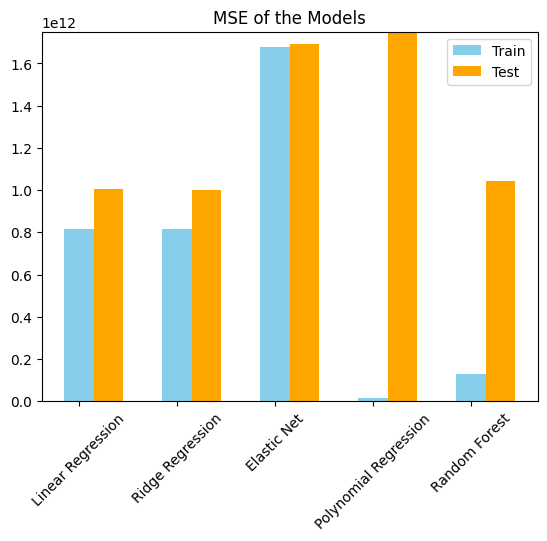

In [78]:
plot_mse_of_the_models()

In [79]:
def plot_rmse_of_the_models():
    plt.bar(np.arange(len(metrics_df)), metrics_df["RMSE Train"], color="skyblue", width=0.3, label="Train")
    plt.bar(np.arange(len(metrics_df)) + 0.3, metrics_df["RMSE Test"], color="orange", width=0.3, label="Test")
    plt.xticks(np.arange(len(metrics_df)), metrics_df.index, rotation=45)
    plt.legend()
    plt.title("RMSE of the Models")
    plt.ylim([0, 1.5e6])
    plt.show()

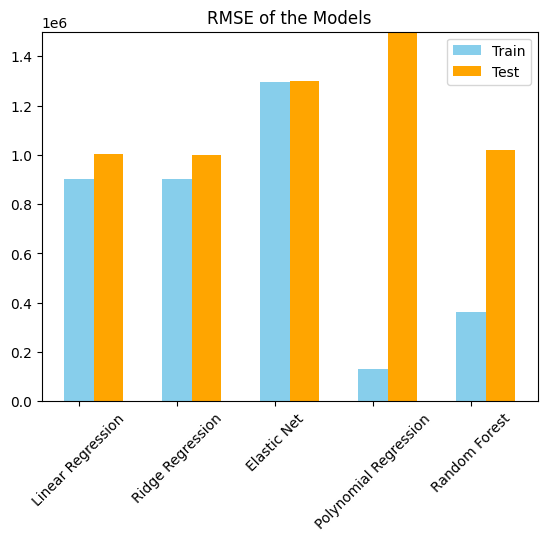

In [80]:
plot_rmse_of_the_models()

# 6. Final model selection and optimization

Among all tested models, the best one seems to be the Random Forest. It has the lowest r2 scores on train and test data. Also it has the lowest MSE and RMSE on test data, however it has quite high MSE and RMSE on the test data. It suggests that the model os overfitting. Possible solutions:
 - gather more data (not possible in this case)
 - regularize or create less complex model (possible)

To create less complex model, optimization to find better hyperparameters could be performed.

### Optimization with Optuna

In [82]:
import optuna

In [85]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 2, 200)
    max_depth = trial.suggest_int("max_depth", 1, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    forest = RandomForestRegressor(n_estimators=n_estimators,
                                   max_depth=max_depth,
                                   min_samples_leaf=min_samples_leaf,
                                   min_samples_split=min_samples_split)
    forest.fit(X_train, y_train)
    prediction = forest.predict(X_test)
    mse = mean_squared_error(y_test, prediction)
    rmse = root_mean_squared_error(y_test, prediction)
    # try to minimize mse and rmse by returning their sum
    return mse + rmse

In [86]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=1000)

[I 2024-08-05 19:19:47,096] A new study created in memory with name: no-name-10fb8626-f55d-4047-b685-96f34493ee18
[I 2024-08-05 19:19:47,152] Trial 0 finished with value: 1635539705447.5786 and parameters: {'n_estimators': 87, 'max_depth': 1, 'min_samples_leaf': 11, 'min_samples_split': 4}. Best is trial 0 with value: 1635539705447.5786.
[I 2024-08-05 19:19:47,165] Trial 1 finished with value: 1058701862359.8018 and parameters: {'n_estimators': 11, 'max_depth': 19, 'min_samples_leaf': 17, 'min_samples_split': 14}. Best is trial 1 with value: 1058701862359.8018.
[I 2024-08-05 19:19:47,205] Trial 2 finished with value: 1036938289948.2571 and parameters: {'n_estimators': 46, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 9}. Best is trial 2 with value: 1036938289948.2571.
[I 2024-08-05 19:19:47,312] Trial 3 finished with value: 987607348661.3516 and parameters: {'n_estimators': 136, 'max_depth': 19, 'min_samples_leaf': 7, 'min_samples_split': 13}. Best is trial 3 with value:

In [87]:
best_params = study.best_params
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 41, 'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 18}


In [88]:
best_forest = RandomForestRegressor(**best_params)
best_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, min_samples_split=18, n_estimators=41)

#### Train prediction

In [89]:
best_forest_train_pred = best_forest.predict(X_train)
best_forest_train_r2, best_forest_train_mse, best_forest_train_rmse = calculate_metrics(
    y_train, best_forest_train_pred, 'Best Random Forest', "train"
)

[Best Random Forest] R2 Score on train set: 0.7866
[Best Random Forest] Mean Squared Error on train set: 547359848097.5632
[Best Random Forest] Root Mean Squared Error on train set: 739837.7174


#### Test prediction

In [90]:
best_forest_test_pred = best_forest.predict(X_test)
best_forest_test_r2, best_forest_test_mse, best_forest_test_rmse = calculate_metrics(
    y_test, best_forest_test_pred, 'Best Random Forest', "test"
)

[Best Random Forest] R2 Score on test set: 0.5935
[Best Random Forest] Mean Squared Error on test set: 997061166376.1179
[Best Random Forest] Root Mean Squared Error on test set: 998529.5020


#### Plot predictions against true values

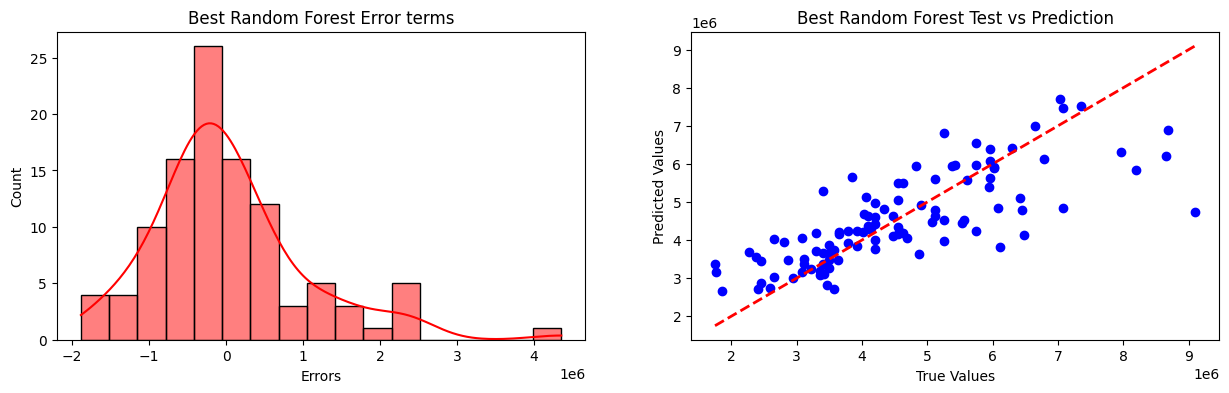

In [91]:
plot_predictions(y_test, best_forest_test_pred, "Best Random Forest")

In [92]:
metrics_df.loc['Best Random Forest'] = [best_forest_train_r2, best_forest_test_r2, best_forest_train_mse,
                                        best_forest_test_mse, best_forest_train_rmse, best_forest_test_rmse]
metrics_df

,R2 Train,R2 Test,MSE Train,MSE Test,RMSE Train,RMSE Test
Model,,,,,,
Linear Regression,0.682220,5.904689e-01,8.151139e+11,1.004406e+12,9.028366e+05,1.002201e+06
Ridge Regression,0.681655,5.923110e-01,8.165630e+11,9.998880e+11,9.036387e+05,9.999440e+05
Elastic Net,0.346826,3.107995e-01,1.675411e+12,1.690316e+12,1.294377e+06,1.300122e+06
Polynomial Regression,0.993148,-6.273417e+17,1.757641e+10,1.538603e+30,1.325761e+05,1.240404e+15
Random Forest,0.949074,5.744374e-01,1.306278e+11,1.043724e+12,3.614247e+05,1.021628e+06
Best Random Forest,0.786607,5.934636e-01,5.473598e+11,9.970612e+11,7.398377e+05,9.985295e+05


### Compare new best forest with other models

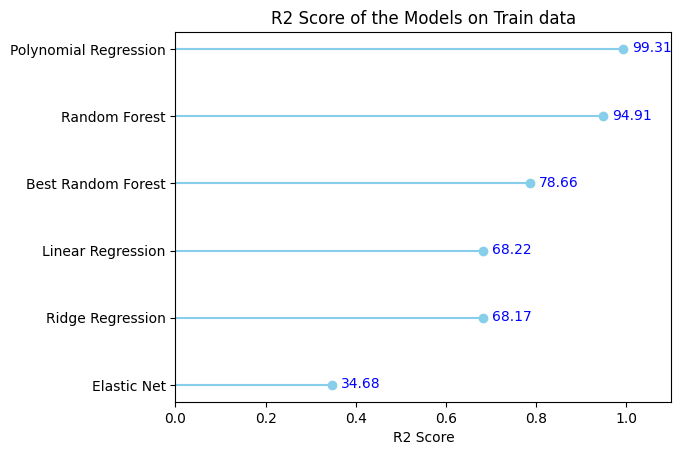

In [93]:
plot_r2_of_the_models("Train")

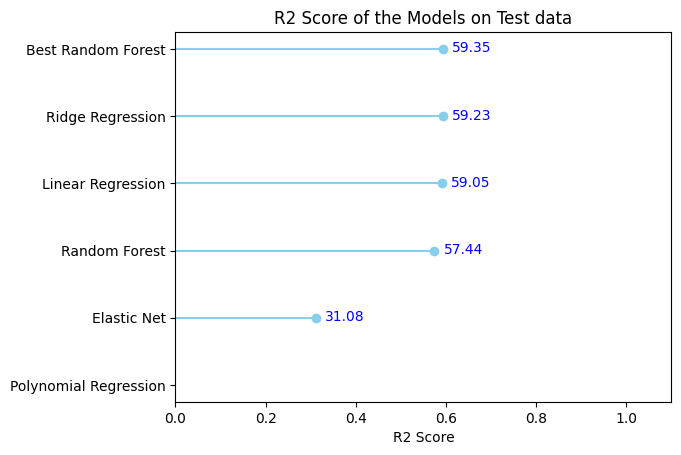

In [94]:
plot_r2_of_the_models("Test")

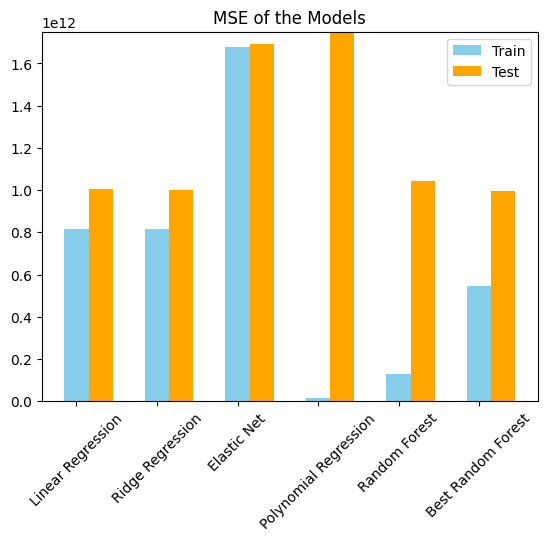

In [95]:
plot_mse_of_the_models()

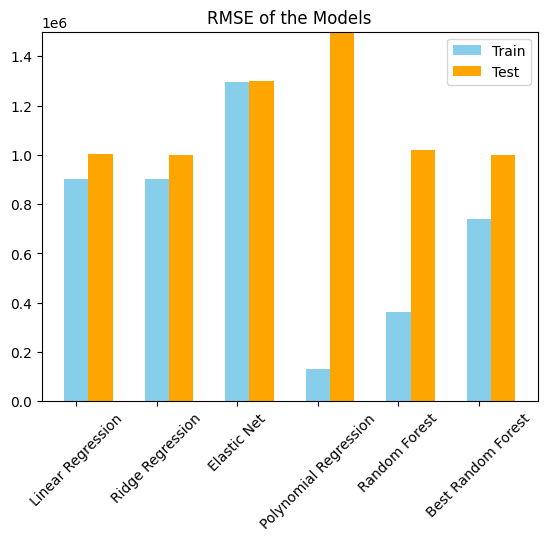

In [96]:
plot_rmse_of_the_models()

### Save the best model

In [97]:
with open('../models/best_forest.pkl', 'wb') as f:
    pickle.dump(best_forest, f)

## Final model and pipeline

In [98]:
from sklearn.pipeline import make_pipeline
import pickle

In [99]:
with open('../models/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

In [100]:
final_pipeline = make_pipeline(
    scaler,
    best_forest
)

In [101]:
X_test.shape

(106, 13)

In [102]:
example_for_final_pred

array([2398,    3,    1,    1,    1,    0,    0,    0,    0,    0,    1,
          1,    0])

In [104]:
# make prediction on example from the original test set
final_pred = final_pipeline.predict(example_for_final_pred.reshape(1, -1))
print(
    f"Predicted value: {final_pred[0]:.4f} vs True value: {value_for_final_pred:.4f}.\nDifference is {(final_pred[0] - value_for_final_pred):.4f}")

Predicted value: 3511896.3643 vs True value: 3118850.0000.
Difference is 393046.3643


# 7. Conclusions

 - The dataset was relatively small, containing only 545 samples, and after preprocessing, 2.7% of the data samples were removed.
 - By visualizing the data distribution and their relationships, we gained insights into the feature set.
 - The features showed high multicollinearity, additionally some feature extraction step using PCA or RFE could have been performed.
 - Testing multiple algorithms with default hyperparameters provided an understanding of the performance of various models on this specific dataset.
 - Although Polynomial Regression (Order-2) tended to overfit, it is advisable to use multiple regression algorithms, as their scores were quite comparable and they are more generalizable.
 - The Random Forest Regressor occured to be the best model with default paramters. It had balanced error which suggested to perform hyperparameter tuning using Optuna. The final model performed quite well, achieving the highest R² score on the test set.